# Build a model to predict the stock price of Netflix


# Objective: -



The goal of this challenge is to build a machine learning model that predicts the stock price of Netflix company.

Netflix is one of the most popular OTT streaming platforms. It offers a vast collection of television series and films and owns its productions known as Netflix Originals. People who are highly active in stock market investments always keep an eye on companies like Netflix because of its popularity.


# Dataset: -

For the Netflix stock price prediction task, you need to download an Netflix stock price dataset. To download a dataset for this task, follow the steps mentioned below:

1. Visit Yahoo Finance
2. Search for Netflix
3. Then click on Historical data
4. And at last click on download

After these steps, you will see a CSV file in your download folder.


# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [117]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import warnings




warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [118]:
#loading the dataset
try:
    df = pd.read_csv('C:/My Sample Notebook/Notebook Template/Netflix Stock Price Detection/data/netflixstock.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [119]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

Date      Open      High       Low     Close  Adj Close    Volume
0  2009-06-15  5.351429  5.505714  5.292857  5.451429   5.451429  14079800
1  2009-06-16  5.474286  5.504286  5.358571  5.404286   5.404286  11970000
2  2009-06-17  5.642857  5.870000  5.588571  5.771429   5.771429  21534100
3  2009-06-18  5.857143  5.940000  5.742857  5.901429   5.901429  12373200
4  2009-06-19  5.918571  6.115714  5.917143  5.941429   5.941429  15915200

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [120]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 3445 rows and 7 columns


#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [121]:
df.shape

(3445, 7)

#### The df.shape method shows the shape of the dataset. 

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445 entries, 0 to 3444
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3445 non-null   object 
 1   Open       3445 non-null   float64
 2   High       3445 non-null   float64
 3   Low        3445 non-null   float64
 4   Close      3445 non-null   float64
 5   Adj Close  3445 non-null   float64
 6   Volume     3445 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 188.5+ KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [123]:
df.iloc[1]

Date         2009-06-16
Open           5.474286
High           5.504286
Low            5.358571
Close          5.404286
Adj Close      5.404286
Volume         11970000
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [124]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [125]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  1
There names are as follows:  ['Date']


In [126]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [127]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  1
There names are as follows:  ['Volume']


In [128]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [129]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  5
There name are as follow:  ['Open', 'High', 'Low', 'Close', 'Adj Close']


## Step 2 Insights: -

1) We have total 7 features where 5 of them are float type, 1 are object type and 1 is int type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [130]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  3445.000000  3445.000000  3445.000000  3445.000000  3445.000000   
mean    182.379629   185.235787   179.407245   182.410716   182.410716   
std     178.743598   181.283428   175.991311   178.674758   178.674758   
min       5.351429     5.504286     5.292857     5.404286     5.404286   
25%      30.825714    31.381430    30.291430    30.832857    30.832857   
50%     102.580002   104.360001   100.709999   102.570000   102.570000   
75%     324.899994   330.079987   318.600006   325.209991   325.209991   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  3.445000e+03  
mean   1.796319e+07  
std    2.016129e+07  
min    1.144000e+06  
25%    6.280300e+06  
50%    1.151320e+07  
75%    2.204930e+07  
max    3.155418e+08

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

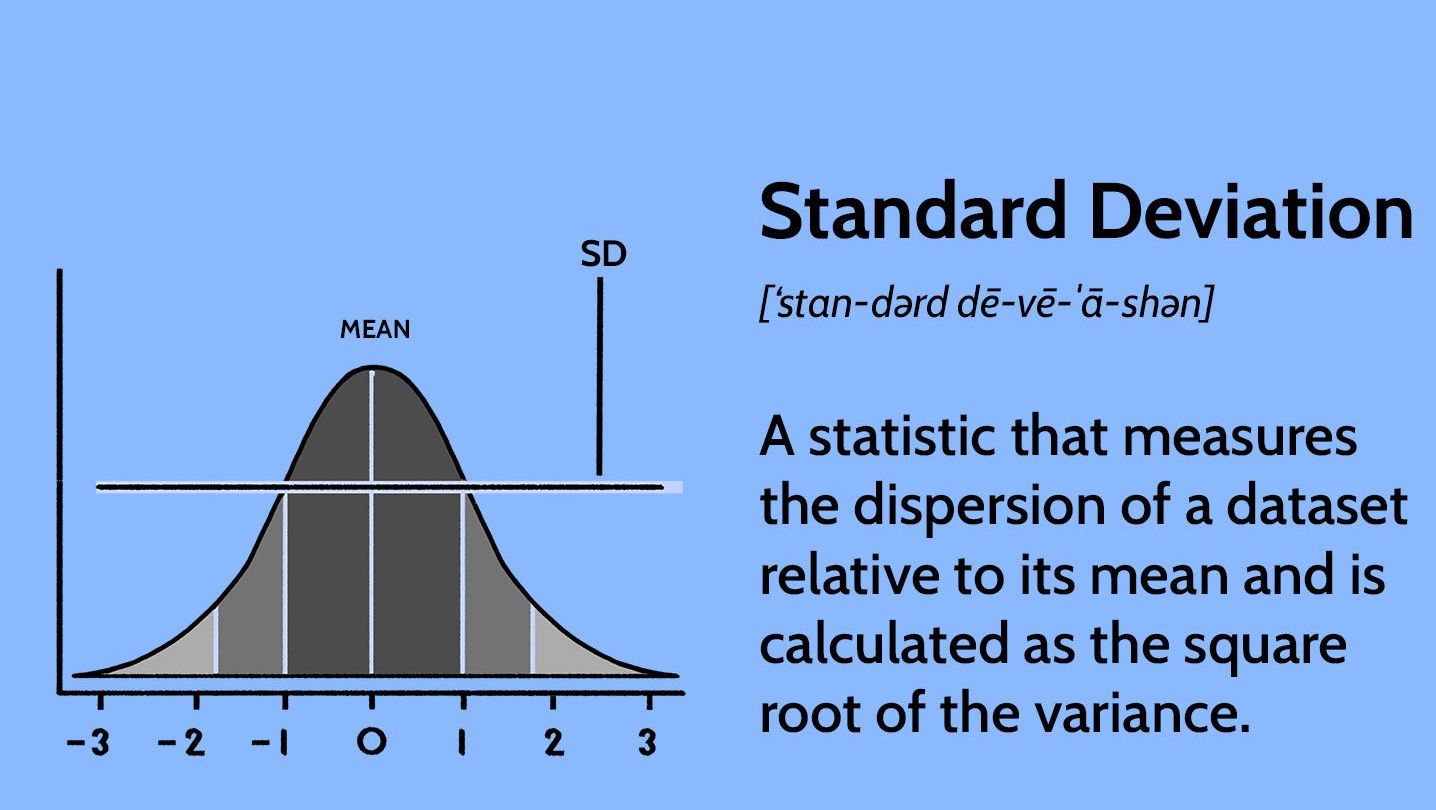

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [131]:
df.std()

Open         1.787436e+02
High         1.812834e+02
Low          1.759913e+02
Close        1.786748e+02
Adj Close    1.786748e+02
Volume       2.016129e+07
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [132]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [133]:
std_cal(df, float64_lst)

normal_value  zero_value
0             5           0

In [134]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

normal_value  zero_value
0             1           0

zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

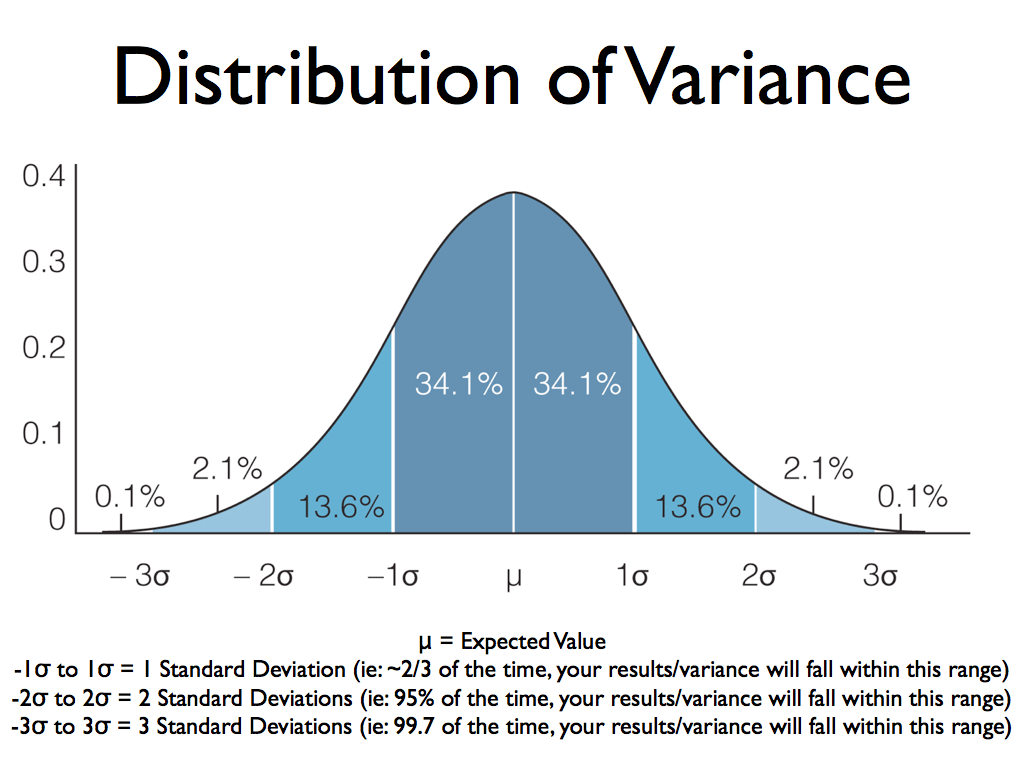

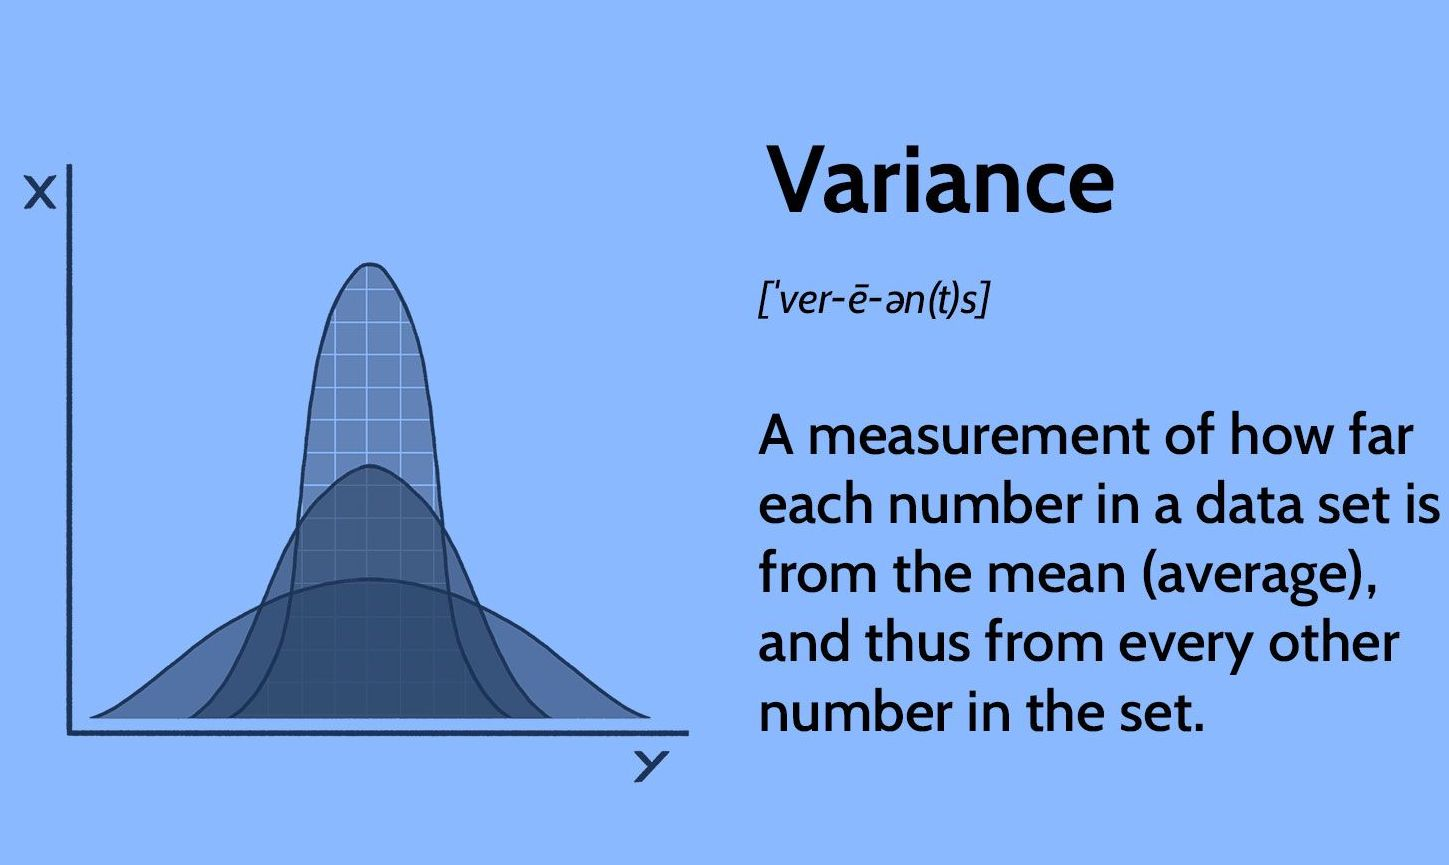

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [135]:
df.var()

Open         3.194927e+04
High         3.286368e+04
Low          3.097294e+04
Close        3.192467e+04
Adj Close    3.192467e+04
Volume       4.064776e+14
dtype: float64

#### We can also understand the Variance using the below function.

In [136]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [137]:
var_cal(df, float64_lst)

normal_value  zero_value
0             5           0

In [138]:
var_cal(df, int64_lst)

normal_value  zero_value
0             1           0

zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

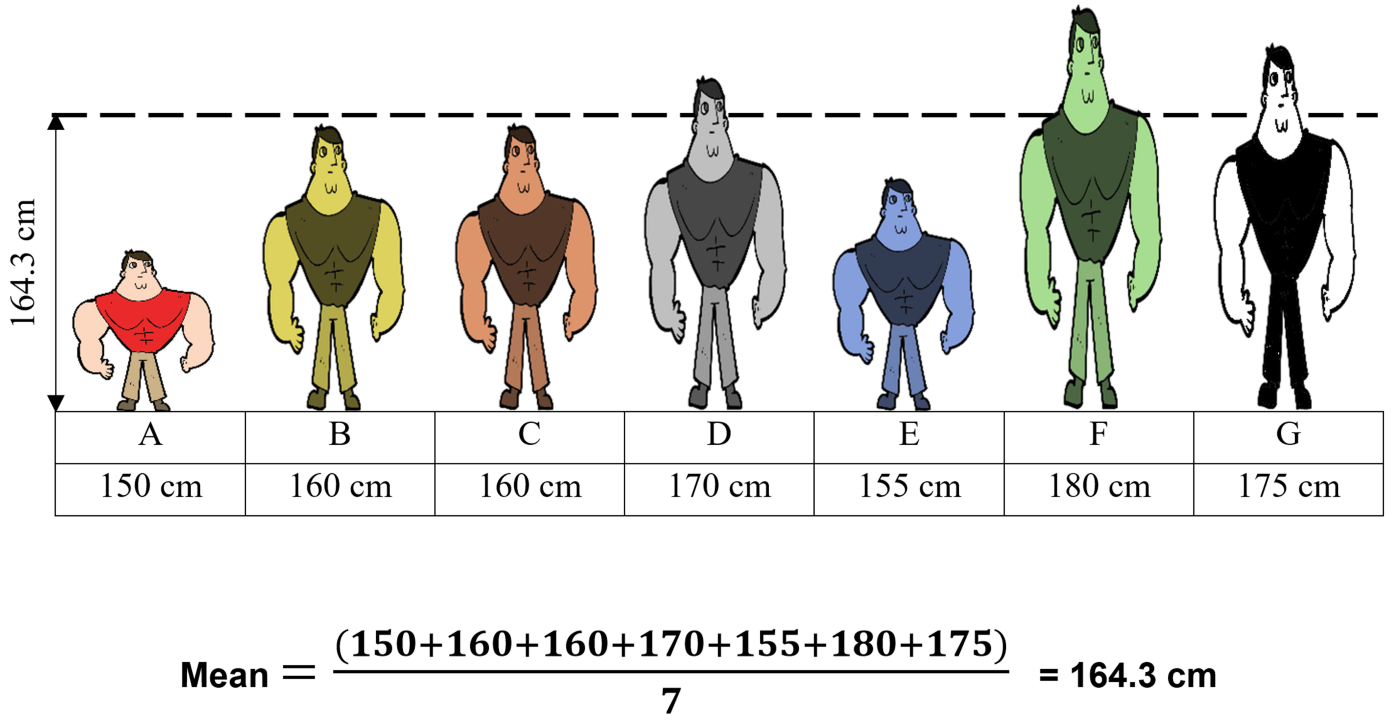

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [139]:
df.mean()

Open         1.823796e+02
High         1.852358e+02
Low          1.794072e+02
Close        1.824107e+02
Adj Close    1.824107e+02
Volume       1.796319e+07
dtype: float64

#### We can also understand the mean using the below function. 

In [140]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [141]:
mean_cal(df, int64_lst)

normal_value  zero_value
0             1           0

In [142]:
mean_cal(df,float64_lst)

normal_value  zero_value
0             5           0

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median
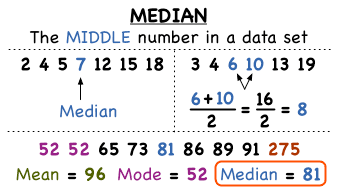

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.The median will depict that the patient below median is Malignent and above that are Benign.

In [143]:
df.median()

Open         1.025800e+02
High         1.043600e+02
Low          1.007100e+02
Close        1.025700e+02
Adj Close    1.025700e+02
Volume       1.151320e+07
dtype: float64

####  We can also understand the median using the below function. 

In [144]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [145]:
median_cal(df, float64_lst)

normal_value  zero_value
0             5           0

In [146]:
median_cal(df, int64_lst)

normal_value  zero_value
0             1           0

zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
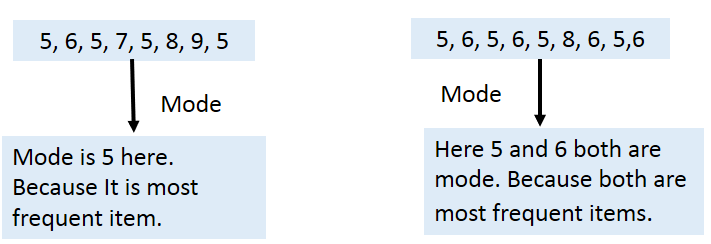
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [147]:
df.mode()

Date   Open  High         Low       Close   Adj Close     Volume
0     2009-06-15  365.0  15.0    8.910000   51.871429   51.871429  3732200.0
1     2009-06-16    NaN   NaN   89.900002  188.539993  188.539993  4621500.0
2     2009-06-17    NaN   NaN  125.750000  357.320007  357.320007  4624800.0
3     2009-06-18    NaN   NaN  288.700012         NaN         NaN  4659500.0
4     2009-06-19    NaN   NaN  359.000000         NaN         NaN  4818800.0
...          ...    ...   ...         ...         ...         ...        ...
3440  2023-02-13    NaN   NaN         NaN         NaN         NaN        NaN
3441  2023-02-14    NaN   NaN         NaN         NaN         NaN        NaN
3442  2023-02-15    NaN   NaN         NaN         NaN         NaN        NaN
3443  2023-02-16    NaN   NaN         NaN         NaN         NaN        NaN
3444  2023-02-17    NaN   NaN         NaN         NaN         NaN        NaN

[3445 rows x 7 columns]

In [148]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [149]:
mode_cal(df, list(df.columns))

normal_value  zero_value  string_value
0             6           0             1

zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


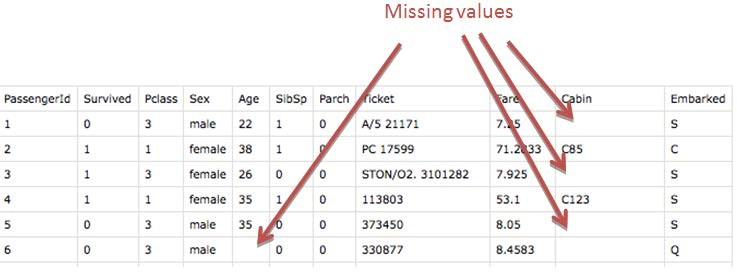

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [150]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As we notice that there are no null values in our dataset.


2. **Nan Values**

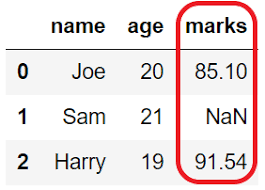

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [151]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As we notice that there are no nan values in our dataset. 

In [152]:
# We have many ways to fill Null/Nan Values as below:

* mean -> average value (for numerical)
* mode -> most repeated value (for categorical)

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)".

# Count of unique occurences of every value in all categorical value



In [153]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

Date       2009-06-15    1
2018-07-18    1
2018-07-20    1
2018-07-23    1
2018-07-24    1
             ..
2014-01-09    1
2014-01-10    1
2014-01-13    1
2014-01-14    1
2023-02-17    1
Name: Date, Length: 3445, dtype: int64


- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

### However, Date is a reference to a particular day represented within a calendar system.
And hence we wont be needing it.

In [154]:
df

Date        Open        High         Low       Close   Adj Close  \
0     2009-06-15    5.351429    5.505714    5.292857    5.451429    5.451429   
1     2009-06-16    5.474286    5.504286    5.358571    5.404286    5.404286   
2     2009-06-17    5.642857    5.870000    5.588571    5.771429    5.771429   
3     2009-06-18    5.857143    5.940000    5.742857    5.901429    5.901429   
4     2009-06-19    5.918571    6.115714    5.917143    5.941429    5.941429   
...          ...         ...         ...         ...         ...         ...   
3440  2023-02-13  349.500000  359.700012  344.250000  358.570007  358.570007   
3441  2023-02-14  357.549988  363.750000  353.399994  359.959991  359.959991   
3442  2023-02-15  356.630005  362.880005  354.239990  361.420013  361.420013   
3443  2023-02-16  355.000000  361.500000  350.309998  350.709991  350.709991   
3444  2023-02-17  347.910004  349.000000  342.440002  347.959991  347.959991   

        Volume  
0     14079800  
1     11970000  
2     21534100  
3     12373200  
4     15915200  
...        ...  
3440   7134400  
3441   4624800  
3442   3969900  
3443   5215700  
3444   5292000  

[3445 rows x 7 columns]

# Skewness 

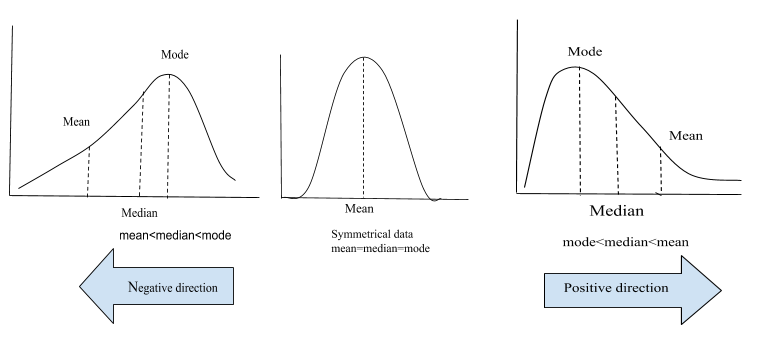

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [155]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [156]:
float64_cols = ['float64','int64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [157]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0       Open          0.8761  positive (+ve) skewed
1       High          0.8692  positive (+ve) skewed
2        Low          0.8812  positive (+ve) skewed
3      Close          0.8737  positive (+ve) skewed
4  Adj Close          0.8737  positive (+ve) skewed
5     Volume          4.1671  positive (+ve) skewed

In [158]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      6                   0                      0

We notice with the above results that we have following details:
1. 6 columns are positive skewed.



### Step 3 Insights: - 

With the statistical analysis we have found that the data have 6 columns with +ve skewness.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

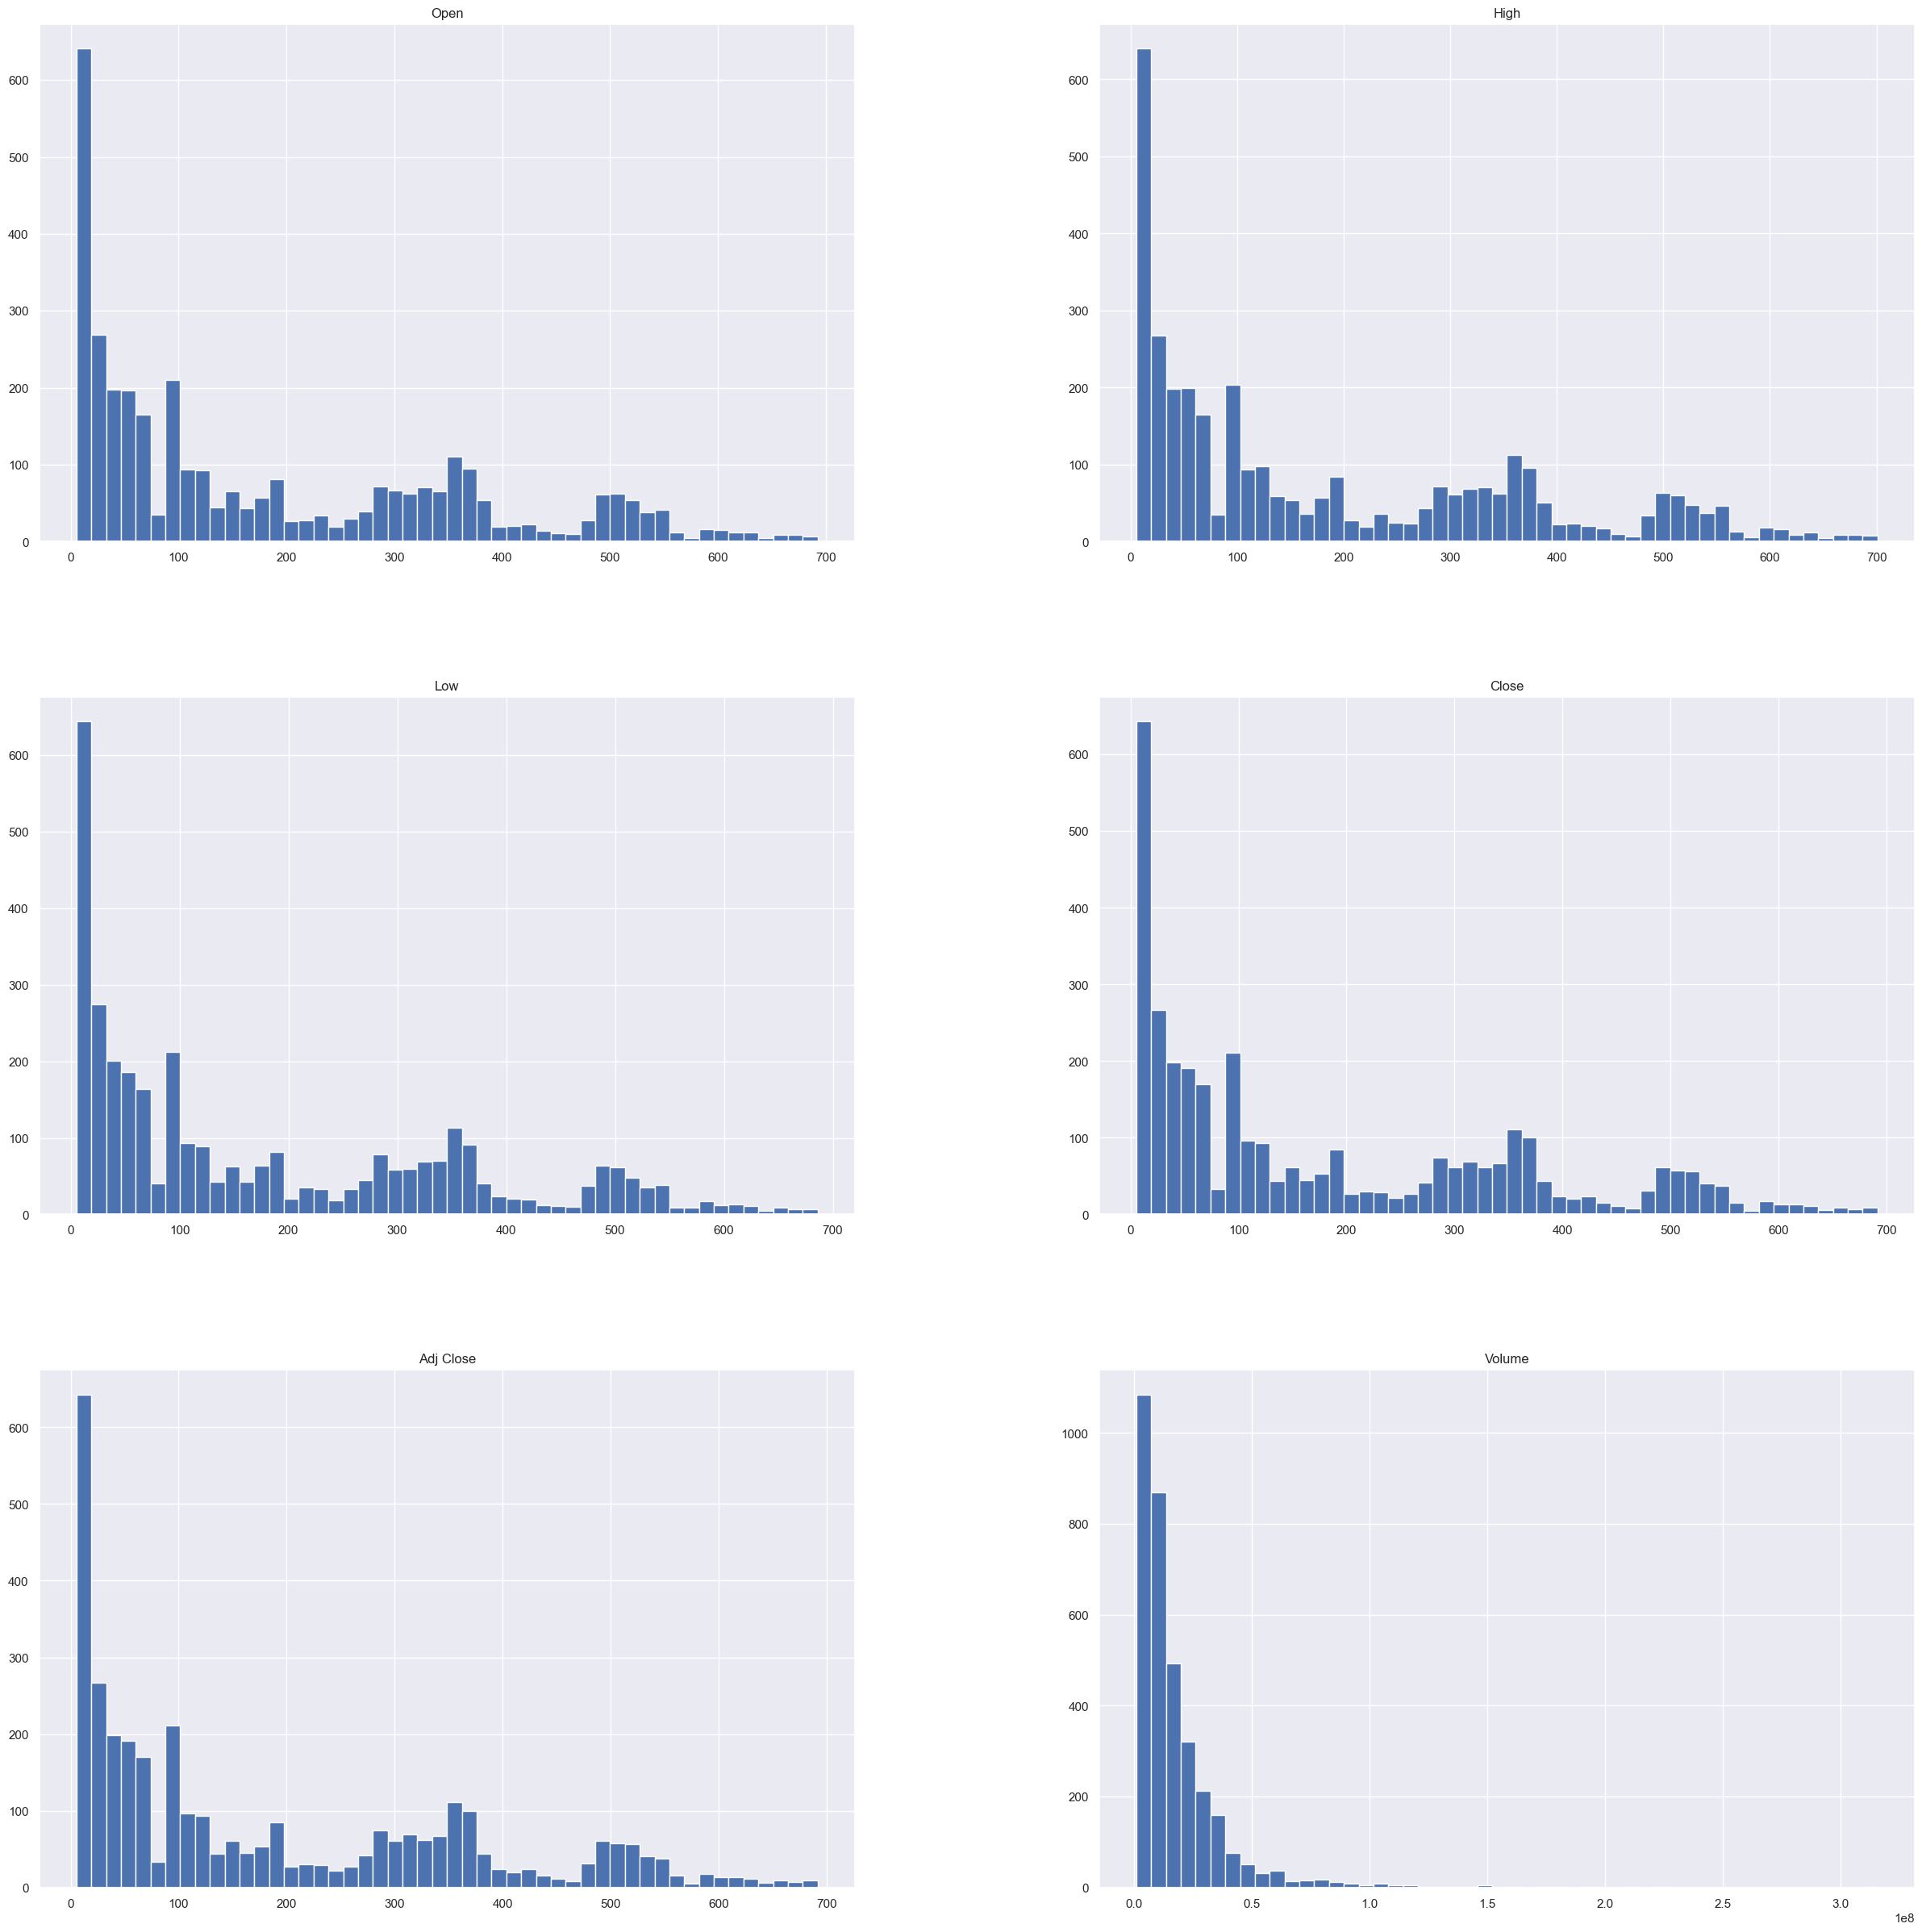

In [159]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()




### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

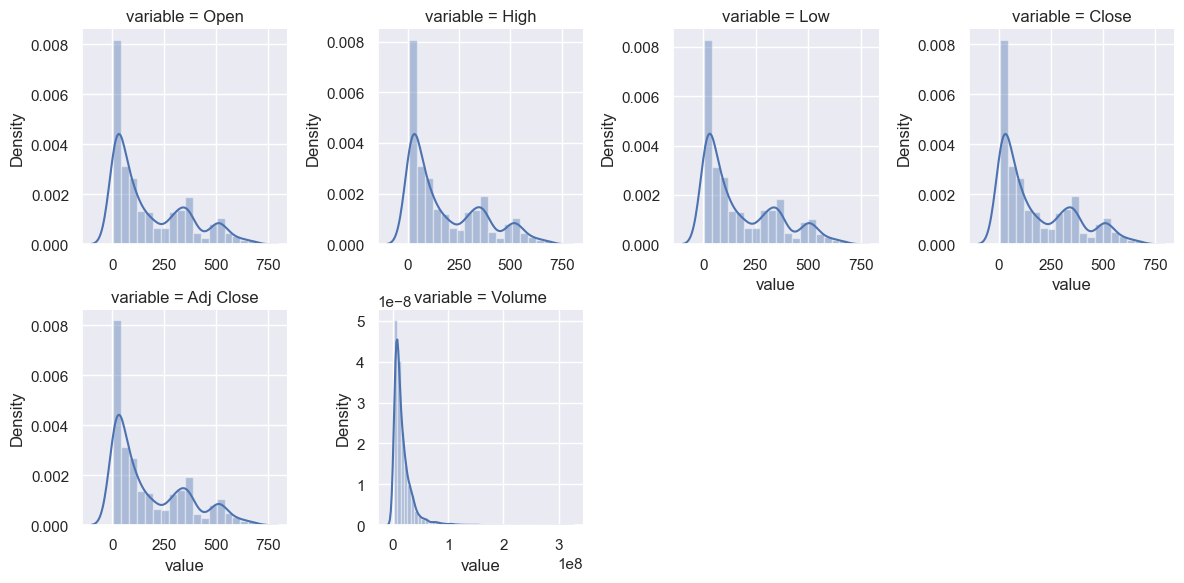

In [160]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 6 columns are positive skewed


### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



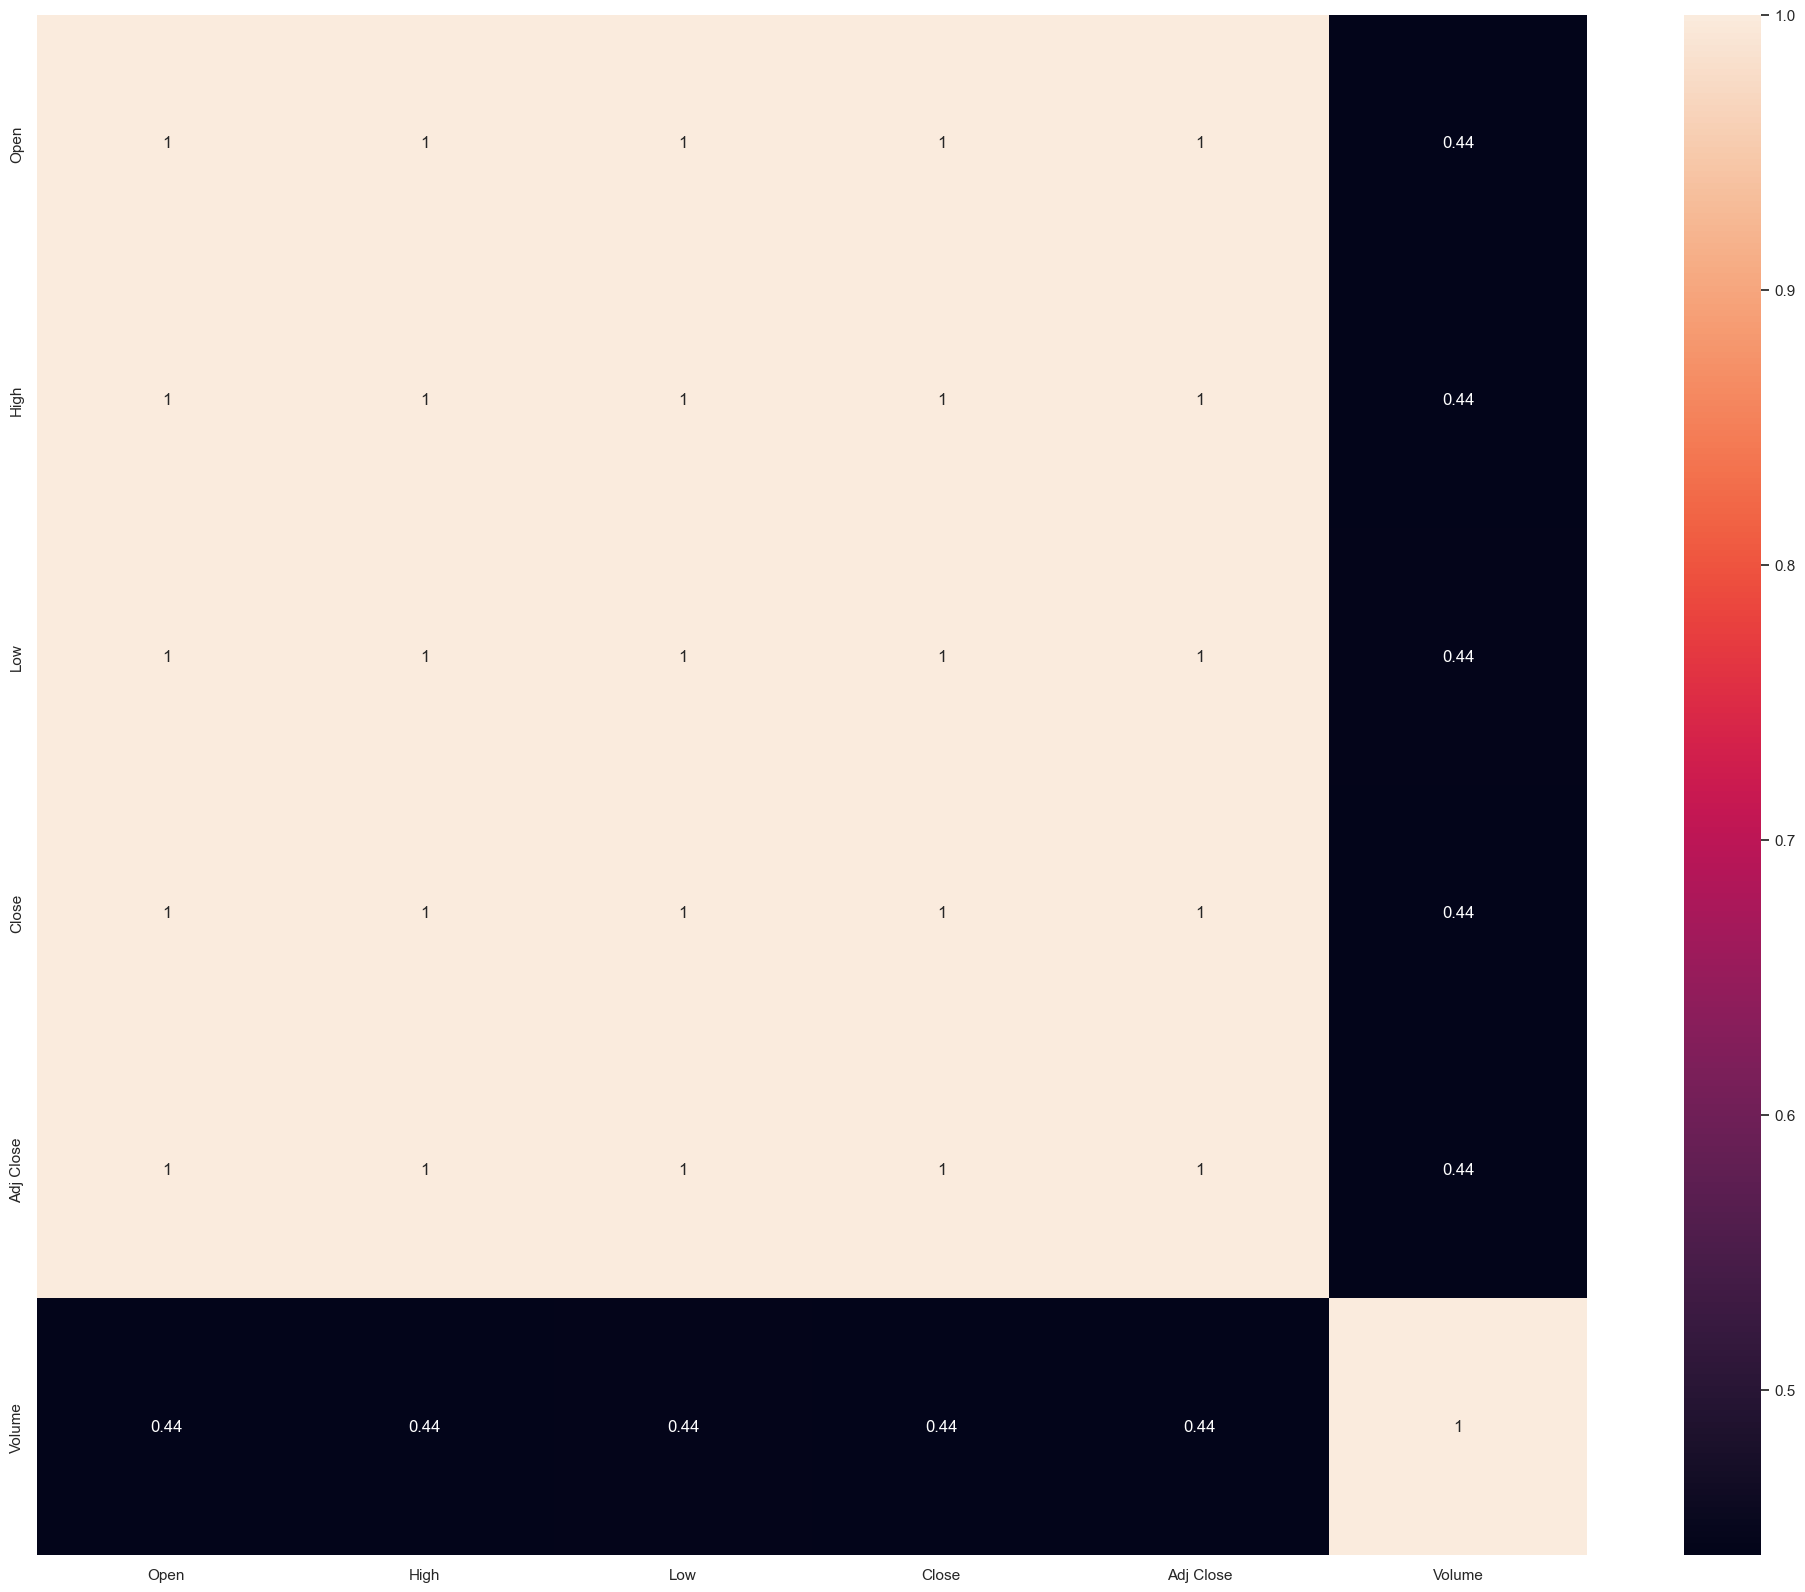

In [161]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against diagnosis. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [162]:
corr

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999799  0.999798  0.999564   0.999564  0.441737
High       0.999799  1.000000  0.999740  0.999806   0.999806  0.440201
Low        0.999798  0.999740  1.000000  0.999792   0.999792  0.443483
Close      0.999564  0.999806  0.999792  1.000000   1.000000  0.441667
Adj Close  0.999564  0.999806  0.999792  1.000000   1.000000  0.441667
Volume     0.441737  0.440201  0.443483  0.441667   0.441667  1.000000

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

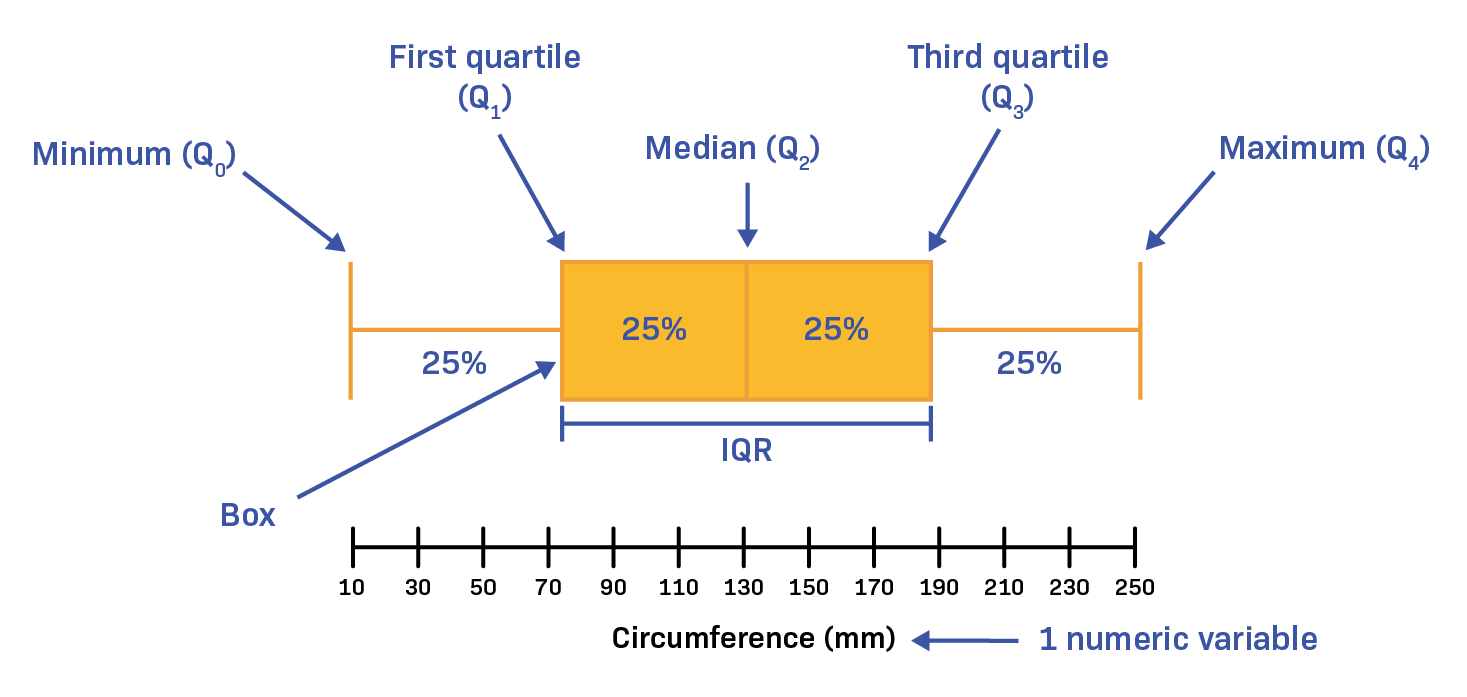

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [163]:
features = [  'Open', 'High', 'Low', 
            'Close', 'Adj Close', 'Volume'
           ]

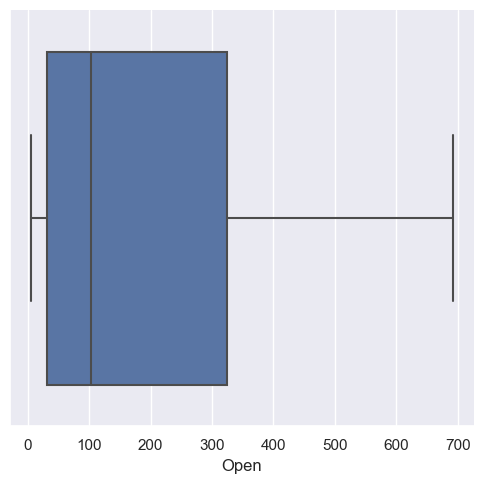

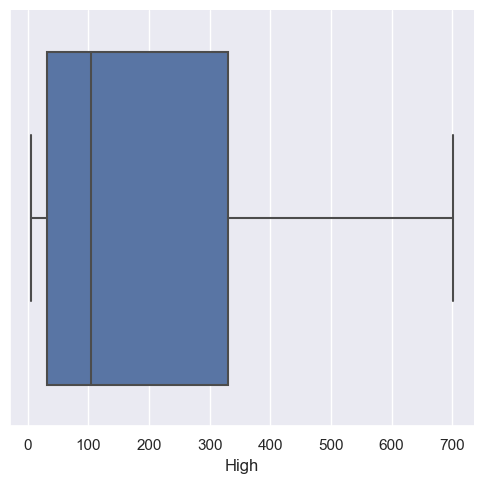

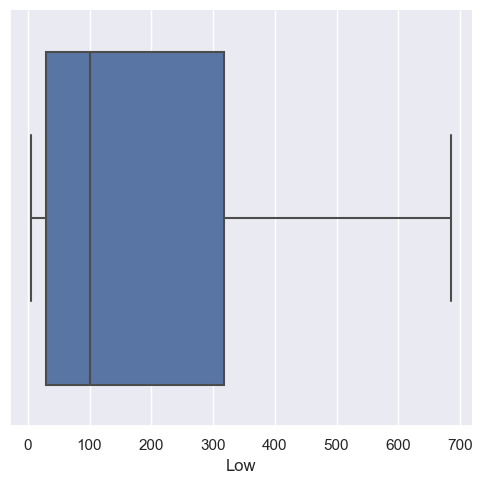

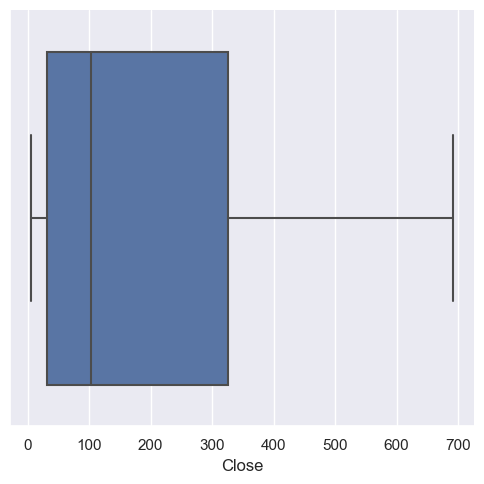

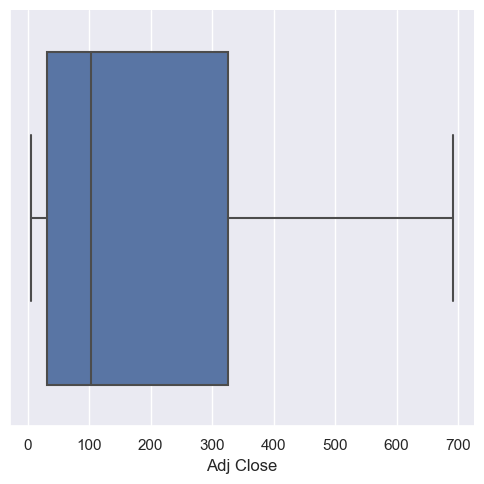

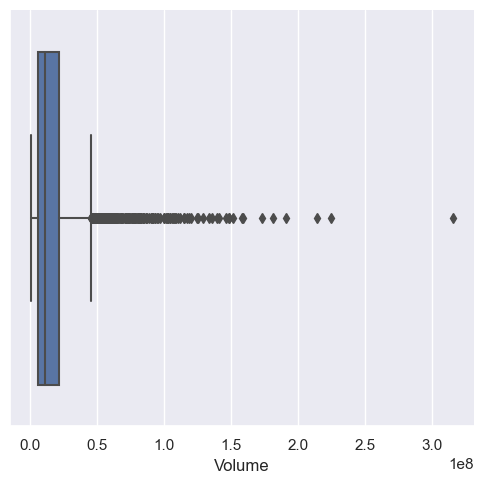

In [164]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

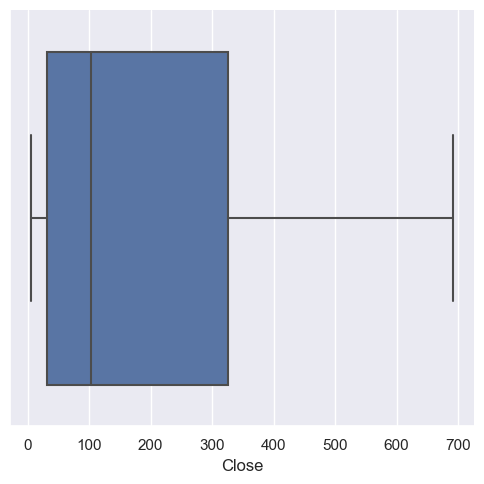

In [165]:
#for target variable
sns.catplot(data=df, x='Close', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# 5. Scatter plot

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. These plots are often called scatter graphs or scatter diagrams.




In [166]:
import plotly.express as px
for value in features:
    figure = px.scatter(data_frame= df,x = value,y = 'Close',trendline = 'ols')
    
    figure.show()

The line between both the variables is called Best Fir Line. The least Sum of Squares of Errors is used as the cost function for Linear Regression. For all possible lines, calculate the sum of squares of errors. The line which has the least sum of squares of errors is the best fit line.The line drawn in a scatter plot, which is near to almost all the points in the plot is known as “line of best fit” or “trend line“.


#### Scatter plot Insight:
We can observe that various variables like Open,High,Low,Close,Adj Close shows continous increase in price. Which relates that these variables are highly correlated with the target variables.

#### Why scatter plot?
Scatter plots are used in either of the following situations.

* When we have paired numerical data
* When there are multiple values of the dependent variable for a unique value of an independent variable
* In determining the relationship between variables in some scenarios, such as identifying potential root causes of  problems, checking whether two products that appear to be related both occur with the exact cause and so on.

# 6. Candlestick Chart

Candlestick charts are used by traders to determine possible price movement based on past patterns. Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies.

In [167]:
#Importing 
import plotly.graph_objects as go

In [168]:
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"], high=df["High"],
                                        low=df["Low"], close=df["Close"])])
figure.update_layout(title = "Netflix Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

### Why Candlestick Chart ?

Candlestick Chart interpretation is important to be successful in the stock market.

* They give you an advantage in determining and predicting the price action movement of the stock.
* It helps you make sense of different strategies for a rewarding trade.
* Candlestick charts have a simple, easy-to-analyze appearance, and, provide more detailed information about the market at a glance than bar or line charts.
* Just by looking at the color and length of a candlestick, traders can determine instantly if the market is strengthening (becoming bullish) or weakening (becoming bearish). It helps you see the direction of the market more easily.
* For an amateur or aspiring trader, candlestick charts can prove to be easy support as a technical analysis tool.
* For a day or swing trading, technical chart analysis proves to be the most convenient tool and is a go-to for many successful traders.


# Now let’s visualize this stock price data to get a clear picture of the increase and decrease of stock prices of apple:



# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [169]:
# Separate target and feature column in X and y variable

target = 'Close'

# X will be the features
X = df[["High", "Open", "Low"]]
#y will be the target variable
y = df[target]

In [170]:
X


High        Open         Low
0       5.505714    5.351429    5.292857
1       5.504286    5.474286    5.358571
2       5.870000    5.642857    5.588571
3       5.940000    5.857143    5.742857
4       6.115714    5.918571    5.917143
...          ...         ...         ...
3440  359.700012  349.500000  344.250000
3441  363.750000  357.549988  353.399994
3442  362.880005  356.630005  354.239990
3443  361.500000  355.000000  350.309998
3444  349.000000  347.910004  342.440002

[3445 rows x 3 columns]

In [171]:
y

0         5.451429
1         5.404286
2         5.771429
3         5.901429
4         5.941429
           ...    
3440    358.570007
3441    359.959991
3442    361.420013
3443    350.709991
3444    347.959991
Name: Close, Length: 3445, dtype: float64

In [172]:
# Check the shape of X and y variable
X.shape, y.shape

((3445, 3), (3445,))

In [173]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [174]:
# Again check the shape of X and y variable
X.shape, y.shape

((3445, 3), (3445, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [175]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2756, 3), (689, 3), (2756, 1), (689, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on DecisionTree Regressor algorithms. As we know that our target variable is in continuous format so we have to apply regression algorithm. 

__Algorithms we are going to use in this step__

1. DecisionTree Regressor
2. Linear Regression (no regularization)
3. Lasso Regression (L1 regularization)


K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [177]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. DecisionTree Regressor

Regression trees are used for dependent variable with continuous values and classification trees are used for dependent variable with discrete values. Basic Theory : Decision tree is derived from the independent variables, with each node having a condition over a feature.
    
Decision Tree is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks with the latter being put more into practical application. It is a tree-structured classifier with three types of nodes.

#### What does it do?

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [178]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)



DecisionTreeRegressor()

In [179]:
#Accuracy check of trainig data

#Get R2 score
DTR.score(X_train, y_train)


1.0

In [180]:
#Accuracy check of test data

#Get R2 score
DTR.score(X_test, y_test) 

0.9995057803050087

In [181]:
# Getting kfold values
DTR_scores = -1 * cross_val_score(DTR, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
DTR_scores

array([4.22575238, 3.6962495 , 3.74681723, 3.3834699 , 3.81893396,
       3.68918619, 3.16061588, 4.67788278, 4.39972145, 3.22154046])

In [182]:
# Mean of the train kfold scores
DTR_score_train = np.mean(DTR_scores)
DTR_score_train

3.802016972306685

### Prediction

Now we will perform prediction on the dataset using DecisionTree Regressor.




In [183]:
y_predicted = DTR.predict(X_test)


In [184]:
# Evaluating

from sklearn.metrics import mean_absolute_error,r2_score

print("The model used is Decision Tree Regressor")

d_acc = r2_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))

lr_score_test = mean_absolute_error(y_test,y_predicted) 
print(f"\nThe MAE is: {lr_score_test} " )
  
lr_score_test= mean_squared_error(y_test, y_predicted)
print(f"\nThe MSE is: {lr_score_test} ")
  
lr_score_test = np.sqrt(mean_squared_error(y_test, y_predicted)) 
print(f"\nThe RMSE is: {lr_score_test}")

The model used is Decision Tree Regressor

The accuracy is: 0.9996452908545296

The MAE is: 1.9211010067833185 

The MSE is: 14.831760690962032 

The RMSE is: 3.8512024993451113


# 2. Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable. Its comes under Supervised Learning technique.

So, Linear regression predicts the output of a numerical dependent variable. Therefore the outcome must be a numerical or continuous value. 

#### Train set cross-validation 

In [185]:
#Using Linear Regression Algorithm to the Training Set
from sklearn.linear_model import LinearRegression

lin_R = LinearRegression() #Object Creation

lin_R.fit(X_train, y_train)

LinearRegression()

In [186]:
#Accuracy check of trainig data

#Get R2 score
lin_R.score(X_train, y_train)


0.99982436062547

In [187]:
#Accuracy check of test data

#Get R2 score
lin_R.score(X_test, y_test) 

0.9998323744364497

In [188]:
# Getting kfold values
lr_scores = -1 * cross_val_score(lin_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lr_scores

array([2.47438582, 2.33080088, 2.56014843, 2.10123691, 2.72568118,
       2.20972227, 2.1323733 , 2.9704583 , 2.04987456, 2.25342344])

In [189]:
# Mean of the train kfold scores
lr_score_train = np.mean(lr_scores)
lr_score_train

2.380810509770335

### Prediction 

Now we will perform prediction on the dataset using Linear Regression.

In [190]:
# Predict the values on X_test_scaled dataset 
lr_predicted = lin_R.predict(X_test)

In [191]:
# Evaluating

from sklearn.metrics import mean_absolute_error,r2_score

print("The model used is Linear Regression")

li_acc = r2_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))

lr_score_test = mean_absolute_error(y_test,y_predicted) 
print(f"\nThe MAE is: {lr_score_test} " )
  
lr_score_test= mean_squared_error(y_test, y_predicted)
print(f"\nThe MSE is: {lr_score_test} ")
  
lr_score_test = np.sqrt(mean_squared_error(y_test, y_predicted)) 
print(f"\nThe RMSE is: {lr_score_test}")


The model used is Linear Regression

The accuracy is: 0.9996452908545296

The MAE is: 1.9211010067833185 

The MSE is: 14.831760690962032 

The RMSE is: 3.8512024993451113


# 3. Lasso Regression 



Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.


#### L1 Regularization

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. On the other hand, L2 regularization (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models. This makes the Lasso far easier to interpret than the Ridge.



In [192]:
#Using Lasso Regression Method to the Training dataset
ls_reg = LassoCV()
ls_reg = ls_reg.fit(X_train, y_train)


In [193]:
#Accuracy check of trainig data
#Get R2 score
ls_reg.score(X_train, y_train)

0.9996834195975436

In [194]:
#Accuracy check of test data
#Get R2 score
ls_reg.score(X_test, y_test) 

0.9996452908545296

In [195]:
#Get kfold values
lasso_scores = -1 * cross_val_score(ls_reg, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
lasso_scores


array([3.58157325, 3.37743627, 3.02839251, 2.87964472, 3.07058673,
       3.04423871, 2.97254766, 3.20070757, 3.15293658, 3.66369334])

In [196]:
# Mean of the train kfold scores
lasso_score_train = np.mean(lasso_scores)
lasso_score_train

3.197175736345163

### Prediction

In [197]:
# Predict the values on X_test_scaled dataset 
y_predicted = ls_reg.predict(X_test)

In [198]:
# Evaluating



print("The model used is Lasso Regression")

l_acc = r2_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))

lasso_score_test = mean_absolute_error(y_test,y_predicted)
print(f"\nThe MAE is: {lasso_score_test}")
  
lasso_score_test = mean_squared_error(y_test, y_predicted)
print(f"\nThe MSE is: {lasso_score_test}")
  
lasso_score_test  = np.sqrt(mean_squared_error(y_test, y_predicted)) 
print(f"\nThe RMSE is: {lasso_score_test}")

The model used is Lasso Regression

The accuracy is: 0.9996452908545296

The MAE is: 1.714705651524869

The MSE is: 10.644984839395649

The RMSE is: 3.262665296869363


# Evaluation: -

In [199]:

train_metrics = np.array([d_acc,
                          li_acc, 
                          l_acc
                          
                         ]) 
train_metrics = pd.DataFrame(train_metrics, columns=['Accuracy'])
train_metrics.index = ['DecisionTree Regressor',
                       'Linear Regression', 
                       'Lasso Regression'
                      ]
train_metrics

Accuracy
DecisionTree Regressor  0.999506
Linear Regression       0.999506
Lasso Regression        0.999645

# Insight:-

- As you can see with our Linear Regression Model(0.99 or 99.96%).
- So we gonna save our model with Linear Regression Algorithm

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [200]:
import pickle
pickle.dump(DTR , open('Netflix_Stock_DecisionTree.pkl', 'wb'))

In [201]:
import pickle
pickle.dump(lin_R , open('Netflix_Stock_linear.pkl', 'wb'))

In [202]:
import pickle
pickle.dump(ls_reg , open('Netflix_Stock_lasso.pkl', 'wb'))

In [203]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Netflix_Stock_DecisionTree.pkl', 'rb'))
    Stock_Price = str(list(pickled_model.predict(features)))
    
    
   
    
    return str(f'The Stock price of Netflix is {Stock_Price}')

In [204]:
#"Open", "High", "Low"


Open     =    5.351429
High     =    5.505714
Low      =    5.292857

In [205]:
model_prediction([[Open,High,Low]])

'The Stock price of Netflix is [5.528571128845215]'

#### We can test our model by giving our own parameters or features to predict. 

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/BreastCancerAPI

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps in predicting the Price of Netflix company Stocks. It will help the Investors to understand & when to invest money into Netflix Stocks so they can get good returns in future.The accuracy for the prediction is 99.9%.